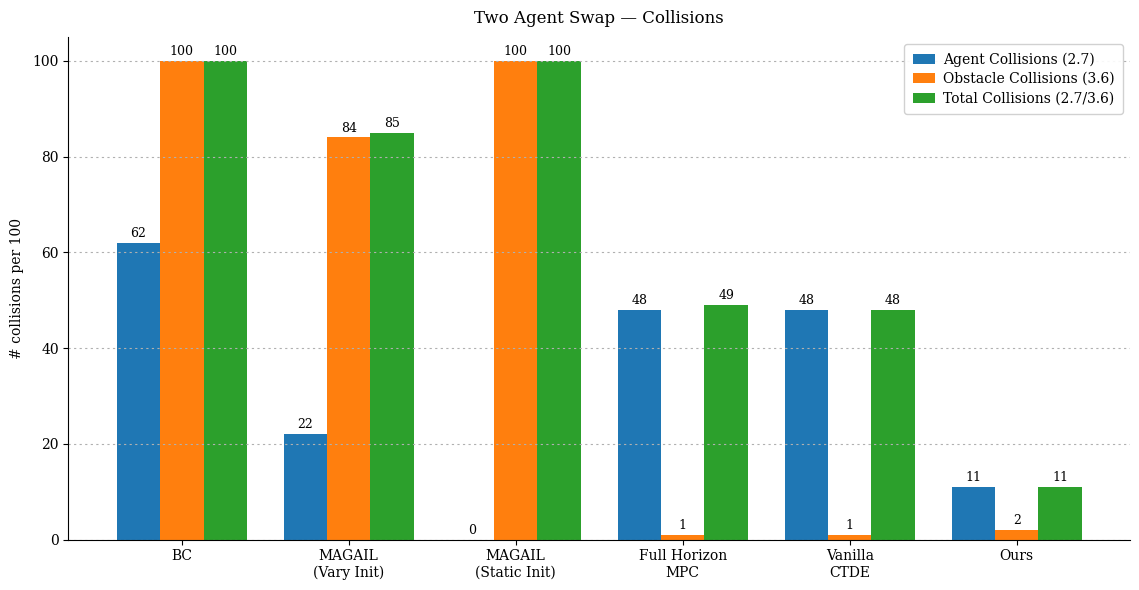

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MultipleLocator

# Palatino (with fallbacks)
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Palatino", "Palatino Linotype", "Book Antiqua",
                   "URW Palladio L", "TeX Gyre Pagella", "DejaVu Serif"],
    "axes.unicode_minus": False,
})

methods = [
    "BC",
    "MAGAIL\n(Vary Init)",
    "MAGAIL\n(Static Init)",
    "Full Horizon\nMPC",
    "Vanilla\nCTDE",
    "Ours",
]

data = {
    "Agent Collisions (2.7)": [62, 22, 0, 48, 48, 11],
    "Obstacle Collisions (3.6)": [100, 84, 100, 1, 1, 2],
    "Total Collisions (2.7/3.6)": [100, 85, 100, 49, 48, 11],
}

df = pd.DataFrame(data, index=methods)

x = list(range(len(methods)))
width = 0.26
fig, ax = plt.subplots(figsize=(11.5, 6))

ax.bar([i - width for i in x], df.iloc[:, 0].values, width, label=df.columns[0])
ax.bar(x,                         df.iloc[:, 1].values, width, label=df.columns[1])
ax.bar([i + width for i in x],    df.iloc[:, 2].values, width, label=df.columns[2])

ax.set_title("Two Agent Swap — Collisions", pad=10)
ax.set_ylabel("# collisions per 100", labelpad=6)
ax.set_ylim(0, 105)

# Horizontal x labels
ax.set_xticks(x)
ax.set_xticklabels(methods, rotation=0, ha="center")

# Clean look + light grid
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(axis="y", linestyle=(0, (2, 3)), linewidth=0.8)
ax.yaxis.set_major_locator(MultipleLocator(20))

# Legend: top-right, single column, tidy spacing
leg = ax.legend(
    loc="upper right",            # top-right corner inside the axes
    ncol=1,
    frameon=True,
    fancybox=True,
    framealpha=0.9,
    edgecolor="0.8",
    # title="Metrics",
    title_fontsize=10,
    fontsize=10,
    handlelength=1.6,
    handletextpad=0.6,
    borderpad=0.6,
    labelspacing=0.4,
)

# Value labels
for container in ax.containers:
    ax.bar_label(container, padding=2, fontsize=9)

fig.tight_layout()
plt.show()
